# DESAFIOS Aula 3

## Base para os desafios

In [0]:
# Base da Aula 3
import warnings
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format


imdb = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv")
imdb = imdb.drop_duplicates()
imdb_usa = imdb.query("country == 'USA'")
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']


color_or_bw = imdb.query("color in ['Color', ' Black and White']")
color_or_bw["color_0_ou_1"] = (color_or_bw["color"]=="Color") * 1

budget_gross = imdb_usa.query("budget >0 | gross > 0")[["budget", "lucro"]].dropna()

filmes_por_diretor = imdb_usa["director_name"].value_counts()
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["dindin", "filmes_irmaos"]
gross_director = gross_director.reset_index()

## Desafio 1 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

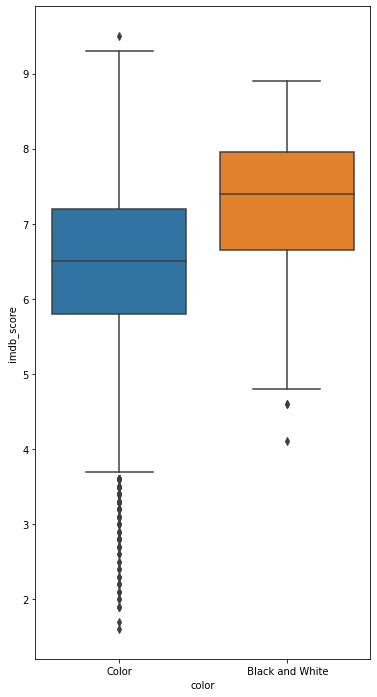

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,12))
sns.boxplot(data = color_or_bw.query("color in ['Color',' Black and White']"), x ="color", y="imdb_score")
plt.show()

- Os filmes em Preto e Branco são melhores avaliados, porem os avaliadores são mais exigentes e nenhum filme tem nota maior que 9.
- Os filmes coloridos tem a maiores e menores notas, com um grande número de outliers tambem, com isso podemos observar que esses filmes atendem um número maior de pessoas com gostos de generos diferentes, o que pode ter causado  extramento das notas

##Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

No gráfico de **budget por lucro** temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).

In [5]:
imdb_usa = imdb_usa.dropna()
display(imdb_usa.sort_values('lucro')[['director_name','movie_title','lucro','budget' ]].head(1))

,director_name,movie_title,lucro,budget
5,Andrew Stanton,John Carter,"-190,641,321.00","263,700,000.00"


Podemos observar que o ponto representa o maior prejuizo, então a ideia foi filtrar valor mínimo do lucro

##Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

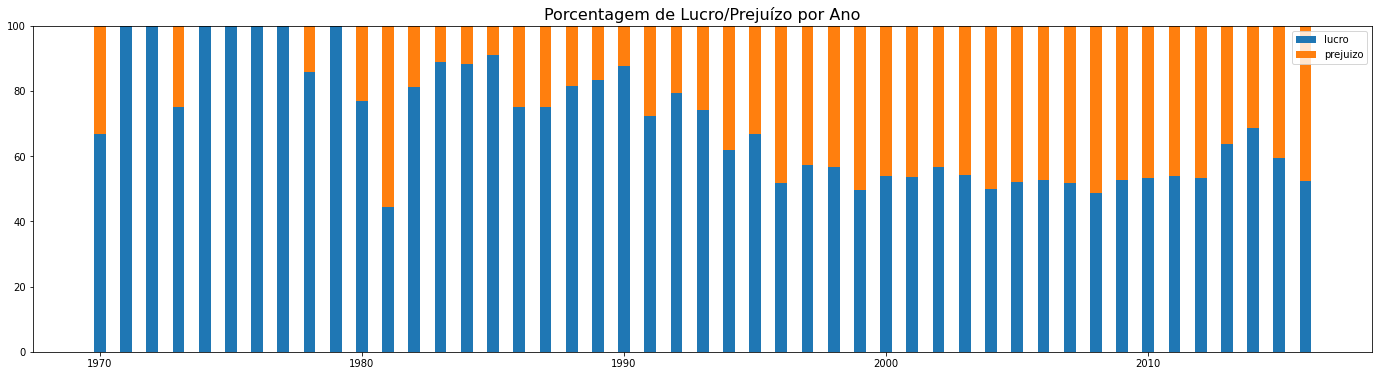

In [6]:
lucro_prejuizo = imdb_usa.query("title_year >= 1970")
# criei uma coluna com os filmes que deram lucro
lucro_prejuizo["lucro_1"] = (imdb_usa["lucro"]>0) * 1
# criei uma coluna com os filmes que deram prejuizo
lucro_prejuizo["prejuizo_1"] = (imdb_usa["lucro"]<=0) * 1
# agrupei as novas series por ano
lucro_prejuizo_ano = lucro_prejuizo.groupby('title_year').agg({'lucro_1':'sum', 'prejuizo_1':'sum'})
# calculei a porcentagem
lucro_prejuizo_ano["total"] = lucro_prejuizo_ano["lucro_1"] + lucro_prejuizo_ano["prejuizo_1"]
lucro_prejuizo_ano["lucro_%"] = ( 100*lucro_prejuizo_ano["lucro_1"] )/ lucro_prejuizo_ano["total"]
lucro_prejuizo_ano["prejuizo_%"] = ( 100*lucro_prejuizo_ano["prejuizo_1"]) / lucro_prejuizo_ano["total"]
width = 0.45      
# plotei a porcentagem no grafico
fig, ax = plt.subplots(figsize=(24, 6))
ax.bar(lucro_prejuizo_ano.index, lucro_prejuizo_ano["lucro_%"], width,  label='lucro')
ax.bar(lucro_prejuizo_ano.index, lucro_prejuizo_ano["prejuizo_%"], width, bottom=lucro_prejuizo_ano["lucro_%"], label='prejuizo')
plt.title("Porcentagem de Lucro/Prejuízo por Ano",fontsize= 16)
ax.legend()
plt.show()

Analisando o grafico e o fato historico que os filmes dos anos 1970/1980 revolucionaram o cinema, podemos notar que essa revolução impacta nas lembranças dos filmes antigos gerando lucros até hoje, porem isso não acontece no filmes da decada de 90 e anos 2000.

## Desafio 4 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

In [7]:
display(imdb_usa.query("title_year<=1939").sort_values('lucro', ascending=False)[["movie_title","title_year", "lucro"]].head(5))

,movie_title,title_year,lucro
3970,Gone with the Wind,"1,939.00","194,678,278.00"
4449,Snow White and the Seven Dwarfs,"1,937.00","182,925,485.00"
4157,The Wizard of Oz,"1,939.00","19,402,612.00"
4812,The Broadway Melody,"1,929.00","2,429,000.00"
4706,Top Hat,"1,935.00","2,391,000.00"


## Desafio 5 do [Paulo Silveira](https://twitter.com/paulo_caelum)

No gráfico de **filmes_irmaos por dindin** temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)

In [8]:
gross_director.query("filmes_irmaos > 16 and filmes_irmaos < 20")

,director_name,dindin,filmes_irmaos
1538,Woody Allen,"7,496,522.00",18.00
1737,Woody Allen,"16,684,352.00",18.00
1861,Woody Allen,"13,383,737.00",18.00
1869,Woody Allen,"10,569,071.00",18.00
1872,Woody Allen,"9,714,482.00",18.00
1960,Woody Allen,"33,404,871.00",18.00
1975,Woody Allen,"17,071,230.00",18.00
1993,Woody Allen,"3,203,044.00",18.00
2070,Woody Allen,"14,792,779.00",18.00
2078,Woody Allen,"4,839,383.00",18.00


## Desafio 6 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

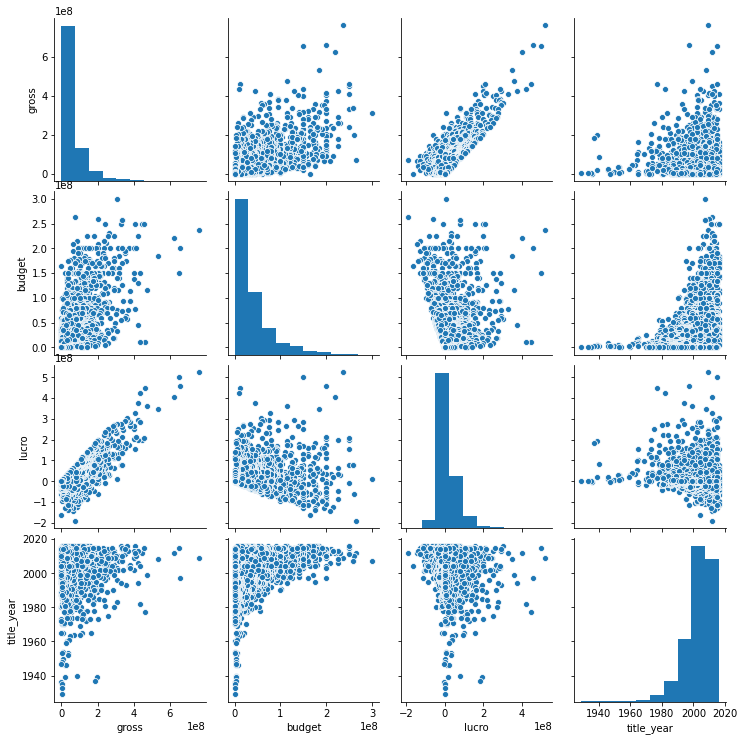

In [9]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])

É possível confirmar a tendência do mercado filmes, onde a industria investe cada vez mais grandes valores em menos filmes esperando um retorno proporcional ao investido.

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

In [10]:
filmes_maior_1999 = imdb_usa.query("title_year>1999")[["gross", "budget", "lucro", "title_year"]]
display(filmes_maior_1999.corr())

,gross,budget,lucro,title_year
gross,1.00,0.70,0.77,0.12
budget,0.70,1.00,0.09,0.15
lucro,0.77,0.09,1.00,0.04
title_year,0.12,0.15,0.04,1.00


O title_year tem pouco impacto na correlações com os outros valores, pois são correlação estão todas perto de 0. 
Já o faturamento tem correlação direta com com o lucro, já um orçamento não possui mesmo impacto no lucro.

## Desafio 8 do [Allan Spadini](https://twitter.com/allanspadini)

Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

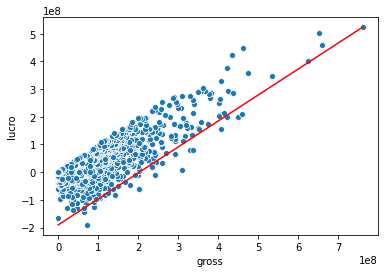

In [11]:
sns.scatterplot(x="gross", y="lucro", data = imdb_usa)
# Sobrescrevi o grafico anterior com um grafico de linha com os limites do imdb_usa
limites = imdb_usa[["gross","lucro"]].aggregate(['max','min'])
sns.lineplot(x=[limites["gross"]["min"],limites["gross"]["max"]], y=[limites["lucro"]["min"],limites["lucro"]["max"]], color='r')

## Desafio 9 da [Thais André](https://twitter.com/thais_tandre)

Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.


,num_voted_users,budget,imdb_score,title_year
num_voted_users,1.00,0.40,0.51,0.03
budget,0.40,1.00,0.07,0.25
imdb_score,0.51,0.07,1.00,-0.15
title_year,0.03,0.25,-0.15,1.00


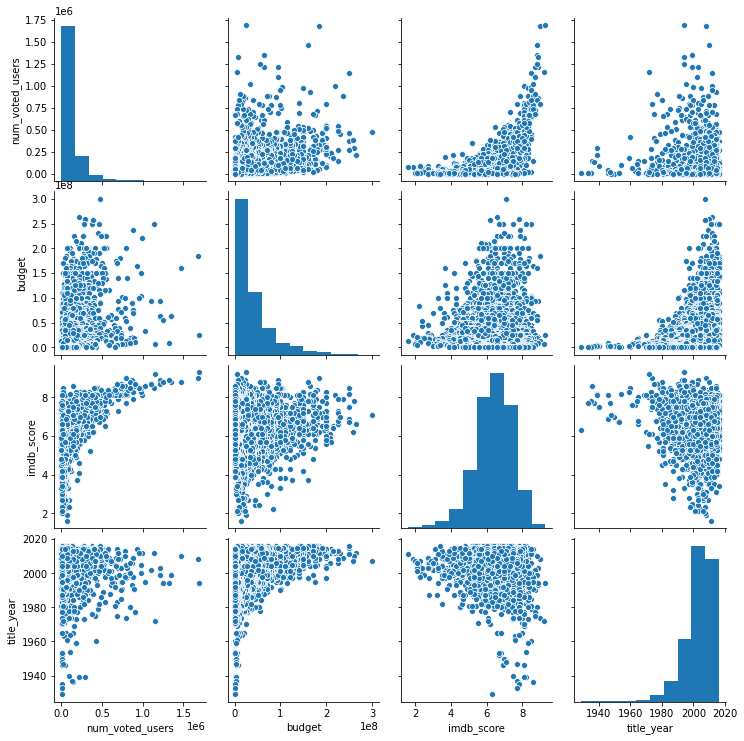

In [12]:
filmes_lucros_votos_nota_ano = imdb_usa[["num_voted_users", "budget", "imdb_score", "title_year" ]]
display(filmes_lucros_votos_nota_ano.corr())
sns.pairplot(data = filmes_lucros_votos_nota_ano)

Os filmes anteriores aos anos 80 são menos avaliados, porem possuem as melhores notas e os orçamementos altos não são garantem boas notas e nem bastante votos.



#Não esqueça de compartilhar a solução dos seus desafios com nossos instrutores, seja no Twitter, seja LinkedIn. Boa sorte!

## Desafio 10 da [Marcelo Guma](https://twitter.com/macelogc)

Comprovar que nos ultimos anos maior lucro e prejuízo, é maior investimento


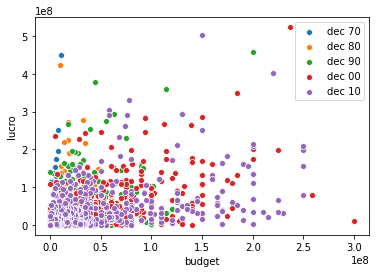

In [13]:
budget_lucro = imdb_usa.query("title_year >= 1970 & title_year < 1980 & lucro > 0")
ax_70 = sns.scatterplot(x="budget", y="lucro", data = budget_lucro)
budget_lucro = imdb_usa.query("title_year >= 1980 & title_year < 1990 & lucro > 0")
ax_80 = sns.scatterplot(x="budget", y="lucro", data = budget_lucro)
budget_lucro = imdb_usa.query("title_year >= 1990 & title_year < 2000 & lucro > 0")
ax_90 = sns.scatterplot(x="budget", y="lucro", data = budget_lucro)
budget_lucro = imdb_usa.query("title_year >= 2000 & title_year < 2010 & lucro > 0")
ax_00 = sns.scatterplot(x="budget", y="lucro", data = budget_lucro)
budget_lucro = imdb_usa.query("title_year >= 2010 & lucro > 0")
ax_10 = sns.scatterplot(x="budget", y="lucro", data = budget_lucro)
plt.legend(['dec 70','dec 80','dec 90','dec 00','dec 10'])
plt.show()

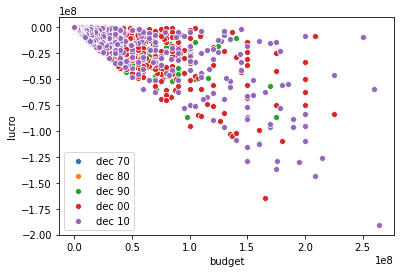

In [14]:
budget_lucro = imdb_usa.query("title_year >= 1970 & title_year < 1980 & lucro < 0")
ax_70 = sns.scatterplot(x="budget", y="lucro", data = budget_lucro)
budget_lucro = imdb_usa.query("title_year >= 1980 & title_year < 1990 & lucro < 0")
ax_80 = sns.scatterplot(x="budget", y="lucro", data = budget_lucro)
budget_lucro = imdb_usa.query("title_year >= 1990 & title_year < 2000 & lucro < 0")
ax_90 = sns.scatterplot(x="budget", y="lucro", data = budget_lucro)
budget_lucro = imdb_usa.query("title_year >= 2000 & title_year < 2010 & lucro < 0")
ax_00 = sns.scatterplot(x="budget", y="lucro", data = budget_lucro)
budget_lucro = imdb_usa.query("title_year >= 2010 & lucro < 0")
ax_10 = sns.scatterplot(x="budget", y="lucro", data = budget_lucro)
plt.legend(['dec 70','dec 80','dec 90','dec 00','dec 10'])
plt.show()